对于给定的数据和待确定的模型，如何确定模型的具体参数？MCMC的提出，本质上就是为了解决贝叶斯推断中，复杂的后验分布难以建模的问题。其解决方案是，使用马尔科夫链去逼近这一真实的后验分布，并使用蒙特卡洛采样法从这一复杂分布中采样。代表算法实例包括Metropolis-Hasting (MH)算法和Hamiltonian Monte Carlo (HMC)算法。

从条件概率定义有完整的贝叶斯推断公式：
$$
P(A|D) = \frac{P(AD)}{P(D)} = \frac{P(D|A)P(A)}{P(D)} = \frac{P(D|A)P(A)}{[P(D|A)P(A) + P(D|B)P(B) + …]} 
$$

P(A,B,C...)叫做先验概率；P(A|D)叫做后验概率。意思是有了实验数据D之后对A重新做了新的概率判断，修订了原来的先验概率。 

P(D|A)叫做似然likelyhood：假设A为条件，D的可能性有多大？

P(D)叫做边缘概率，也叫显著性证据。实际上有：
显著性证据=∑{先验概率*似然}，即P(D)=P(D|A)P(A) + P(D|B)P(B) + …

先验概率乘以似然度的乘积P(D|A)P(A)在贝叶斯推断中被称为先验似然度（prior likelihood）。
实际上后验概率就是先验似然度在总的先验似然度中的占比。

对于高维的连续的参数空间，边缘概率 P(D) 是对参数空间的多维积分，
$$
P(\theta|D)=\frac{P(D|\theta)P(\theta)}{P(D)}=\frac{P(D|\theta)P(\theta)}{\int_{-\infty}^{+\infty}P(D|\theta^{\prime})P(\theta^{\prime})d\theta^{\prime}},
$$
这通常是很难做的。MCMC 的优势在于它不需要显式计算分母 P(D)；通过构造一个马尔可夫链，它可以从后验分布 P(A|D) 中直接采样，同时隐式地处理了分母的归一化问题。

MCMC的成功, 依赖于马尔科夫链的无记忆性、平稳性和细致平衡条件。
1.无记忆性: 在给定当前状态下, 下一时刻的状态只与当前状态有关。
例如, 假设一个由随机变量组成 的链为 $\theta_{1} \rightarrow \theta_{2} \rightarrow \cdots \rightarrow \theta_{T}$, 其中 $\theta_{t}, 1 \leq t \leq T$ 为该变量在时刻 $t$ 的状态。则无记忆性可表示为:
$$P(\theta_{t}|\theta_{t-1}, \ldots, \theta_{1}) = P(\theta_{t}|\theta_{t-1})$$
2.平稳性(stationarity): 对于一个马尔科夫链, 在经过充分长的时间后, 即使初始状态不同, 也最终会收敛到一个平衡分布。
这一性质意味着, 变量可以从一个随机初始状态出发, 收敛到目标分布!

3.细致平衡条件(detailed balance sheet condition): 为了保证MCMC算法的正确性和有效性, 需要满足细致平衡条件。即, 当马尔科夫链满足平稳分布时, 对于任意两个状态之间的转移, 从一个状态到另一个状态的概率与从另一个状态到该状态的概率之比应该等于两个状态在平稳分布上的概率之比。
假设随机变量 $\theta$ 的平稳分布为 $p(\theta) = \pi(\theta)$, 马尔科夫链的状态转移概率为 $A$, 则细致平衡条件可以表示为:
$$
\pi(\theta_{a}) \cdot A(\theta_{a} \rightarrow \theta_{b}) = \pi(\theta_{b}) \cdot A(\theta_{b} \rightarrow \theta_{a})$$
综上, MCMC的本质可以概括如下:
利用马尔科夫链的平稳分布性质, 可以通过构建一个满足平稳分布的马尔科夫链来生成服从该分布的样本。

于是我们的核心问题就变成了，对于任意给定的目标分布 $\pi(x)$, 如何找到以它为唯一平稳分布的马尔科夫链，并且基于马尔科夫链采样的方法，对其近似采样。

平稳分布判定：细致平稳条件

设有马尔科夫链 X, 状态空间为 S, 转移概率矩阵为 A, 以及目标状态分布 $\pi = (\pi_1, \pi_2, \pi_3...)$, 对于任意状态 i,j ∈ S, 任意时刻 t 都满足: $\pi_{i}A_{ij}=\pi_{j}A_{ji}$ ($A_{ij}=A(X_t=j|X_{t-1}=i)$), 则称状态分布 $\pi$ 满足马尔科夫链的细致平衡条件, 该状态分布 $\pi$ 就是马尔科夫链 X 的平稳分布。

可以看出, 细致平稳条件是一个充分条件, 满足这一条件就相当于找到了想要的马尔科夫链。证明：
如果 $\pi_{i}A_{ij}=\pi_{j}A_{ji}$,
对两边的等式求和: $\sum_i \pi_i A_{ij}=\sum_i \pi_j A_{ji}=\pi_j\sum_i  A_{ji}=\pi_j$。
说明此时分布不再随时间改变，即达到了平稳。

然而，怎么通过目标分布确定这个矩阵？如果我们随便找一个状态转移矩阵$Q$,一般是无法满足细致平稳条件的，即：$\pi(i)Q(i,j)\neq\pi(j)Q(j,i)$ 。
对于$Q(i,j)$,对离散型马尔科夫链，我们称之为转移概率，对连续型马尔科夫链我们则称之为转移概率密度，或称转移核。
为了让这个等式能够相等，满足细致平稳条件，可以采用Metropolis-Hastings采
样方法。

在这个采样方法中，针对每一个转移概率 $Q(i,j)$ (建议转移概率proposal distribution），我们再引入一个接受概率 $\alpha(i,j)$（acceptance distribution），使得每一个我们最终要构造的状态转移矩阵 $A(i,j)$ ：
$$A(i,j) = Q(i,j)\alpha(i,j)$$.

于是我们的目标是找一个“建议矩阵” $Q$，这个 $Q$ 满足任意性，但我们可以利用一个明确的、便于随机游走的另一个马尔科夫链，基于转移概率的建议矩阵 $Q$ 中的每一个具体项 $Q(i,j)$ 和接受概率 $\alpha(i,j)$ 来共同决定最终从状态 $i$ 到状态 $j$ 的状态转移概率，以达到如下效果：

$$\pi(i)Q(i,j)\alpha(i,j) = \pi(j)Q(j,i)\alpha(j,i)$$

对于任意给定的建议转移概率矩阵 $Q$，这个接受概率 $\alpha$ 都一定存在吗？答案是：一定存在。马尔科夫链蒙特卡洛方法中的Metropolis-Hastings采样中明确了接受概率 $\alpha$ 的表达式：

$$\alpha(i,j)=min\{\frac{\pi(j)Q(j,i)}{\pi(i)Q(i,j)},1\}$$

也就是说我们任选一个建议矩阵$Q$ ,那么由这个矩阵的每一项和对应的接受概率相乘：
$Q(i,j)\alpha(i,j)=Q(i,j)min\{\frac{\pi(j)Q(j,i)}{1,\pi(i)Q(i,j)}\}$ ,所对应构成的新矩阵，就
是以目标分布$\pi$为唯一稳态分布的马尔科夫链的转移概率矩阵$A$ 。

下面我们给出证明：

$$
\begin{gathered}
\pi(i)A(i,j)=\pi(i)Q(i,j)\alpha(i,j)=\pi(i)Q(i,j)min\{\frac{\pi(j)Q(j,i)}{\pi(i)Q(i,j)},1\} \\
=min\{\pi(j)Q(j,i),\pi(i)Q(i,j)\}=\pi(j)Q(j,i)min\{1,\frac{\pi(i)Q(i,j)}{\pi(j)Q(j,i)}\}
\end{gathered}
$$
对
$$
\pi(i)A(i,j)=\pi(i)Q(i,j)min\{\frac{\pi(j)Q(j,i)}{\pi(i)Q(i,j)},1\}
$$
交换 $i,j$ 顺序
显然有
$$
\pi(j)Q(j,i)min\{1,\frac{\pi(i)Q(i,j)}{\pi(j)Q(j,i)}\}= \pi(j)A(j,i)
$$
所以给定
$$A(i,j) = Q(i,j)\alpha(i,j)=Q(i,j)min\{\frac{\pi(j)Q(j,i)}{\pi(i)Q(i,j)},1\}$$
必然满足
$$
\pi(i)A(i,j)=\pi(j)A(j,i)
$$

建议分布

建议分布 $Q(i,j)$ 有多种可能的形式，这里介绍两种常用形式。
第一种形式：假设建议分布是对称的，即对任意的 $x$ 和 $x'$ 有：
$$Q(x, x') = Q(x', x)$$
这称为 Metropolis 选择，也是 Metropolis-Hastings 算法最初采用的建议分布。
此时，接受分布 $\alpha(x, x')$ 简化为：
$$
\alpha(x, x') = \min \left\{ 1, \frac{\pi(x')}{\pi(x)} \right\}$$
Metropolis 选择的一个特例是 $Q(x, x')$ 取条件概率分布 $p(x'|x)$，定义为多元正态分布，其均值是 $x$，协方差矩阵是常数矩阵。

第二种为独立抽样。假设 $Q(x, x') = Q(x')$ 与当前状态 $x$ 无关，即 $Q(x, x') = Q(x')$。此时，接受分布 $\alpha(x, x')$ 可以写成：
$$
\alpha(x, x') = \min \left\{ 1, \frac{w(x')}{w(x)} \right\},$$
其中：$w(x') = \frac{\pi(x')}{Q(x')}$，$w(x) = \frac{\pi(x)}{Q(x)}$。
独立抽样实现简单，但可能收敛速度慢，通常选择接近目标分布 $\pi(x)$ 的分布作为建议分布 $Q(x)$。

总结Metropolis-Hastings 算法：

1.任意选择一个初始值$x_{0}$ 。

2.对$i=1,2,...,n$循环执行：

(a)设状态$x_{i-1}=x$ ,按照建议分布$Q(x,x^{\prime})$随机抽取一个候选状态$x^{\prime}$。

(b)计算接受概率：

$$\alpha(x,x')=\min\left\{1,\frac{\pi(x')Q(x',x)}{\pi(x)Q(x,x')}\right\}$$

(c)从区间(0,1)中按均匀分布随机抽取一个数$y$。若$y\leq\alpha(x,x^{\prime})$,则状态$x_i=x^{\prime}$;否则，状态$x_i=x$。

我们将进行宇宙学的参数估计，用超新星数据（JLA，joint light-curve analysis）反演得到哈勃常数和宇宙物质能量密度的估计。由于超新星是标准烛光,我们可以根据它们的亮度推算出它们的距离。1998年,两组天文学家观测到远方Ia型超新星的亮度,发现这些超新星的亮度比预期的要暗一些。这意味着这些超新星实际上比我们观测到的要远一些。

宇宙学基本原理：

考虑一个三维空间里的二维球面，其满足球面方程：
$$x_{1}^{2} + x_{2}^{2} + x_{3}^{2} = R^{2}$$
其中 $R$ 为球的半径。
然后考虑球面上两点之间的距离：
$$
\mathrm{d}s^{2} = \mathrm{d}x_{1}^{2} + \mathrm{d}x_{2}^{2} + \mathrm{d}x_{3}^{2}$$
将球面方程微分并代入上式：
$$\mathrm{d}s^{2} = \mathrm{d}x_{1}^{2} + \mathrm{d}x_{2}^{2} + \frac{(x_{1}\mathrm{d}x_{1} + x_{2}\mathrm{d}x_{2})^{2}}{R^{2} - x_{1}^{2} - x_{2}^{2}}$$
用坐标 $r', \theta$ 来表示：$x_{1} = r'\cos\theta, x_{2} = r'\sin\theta$，则有：
$$
\mathrm{d}s^{2} = \frac{R^{2}\mathrm{d}r'^{2}}{R^{2} - r'^{2}} + r'^{2}\mathrm{d}\theta^{2}$$
做变换 $r = r'/R$，有
$$\mathrm{d}s^{2} = R^{2}\left(\frac{\mathrm{d}r^{2}}{1 - r^{2}} + r^{2}\mathrm{d}\theta^{2}\right)$$
而三维空间可以看作四维空间下的“球面”，所以同样可以写出球面方程：
$$
x_{1}^{2} + x_{2}^{2} + x_{3}^{2} + x_{4}^{2} = R^{2}$$
则有：
$$\mathrm{d}s^{2} = R^{2}\left(\frac{\mathrm{d}r^{2}}{1 - r^{2}} + r^{2}\mathrm{d}\theta^{2} + r^{2}\sin^{2}\theta\mathrm{d}\phi^{2}\right)$$

加上时间维度：


$$\mathrm{d}s^2=\mathrm{d}t^2-a^2(t)\Big(\frac{\mathrm{d}r^2}{1-\mathrm{k}r^2}+r^2\mathrm{d}\theta^2+r^2\mathrm{sin}^2\theta\mathrm{d}\phi^2\Big)\:.$$

这里 $a$ 为尺度因子，是时间的函数。
$k$是空间曲率。$k=0$代表空间曲率为零，即空间是平直的，为欧几里得空间。曲率为正的宇宙是闭合的，曲率为负的宇宙是开放的。

根据上述推导，我们得到了 Robertson-
Walker metric:
$$(ds)^2=(c\:dt)^2-a^2(t)\left[\frac{dr^2}{1-kr^2}+r^2\left(d\theta^2+\sin^2\theta\:d\phi^2\right)\right]$$
光线沿着零测地线运动， $(ds=0).$ 考虑一个地球上的观察者，取 $(r=0)$, 我们可以选取 $d\theta=d\phi=0$, 此时有:
$$\frac{c\:dt}{a(t)}=\pm\frac{dr}{(1-kr^2)^{1/2}}$$
正好表示发射光线，负号表示吸收的光线。

考虑在 时刻 $t_e$ 一束光线从 $r_e$ 处发射, 观察者于 $t_0$ 在 $r_0=0$ 接收；接着，第二束光线在 $t_e+\Delta t_e$ 发出并在 $t_0+ \Delta t_0$ 时接收。

根据度规，我们知道两条光线的传播必然满足关系:
$$\int_{t_{e}}^{t_{0}} \frac{dt}{a(t)} = -\frac{1}{c} \int_{r_{e}}^{0} \frac{dr}{\sqrt{1-k r^{2}}}$$
和:
$$
\int_{t_{e}+\Delta t_{e}}^{t_{0}+\Delta t_{0}} \frac{dt}{a(t)} = -\frac{1}{c} \int_{r_{e}}^{0} \frac{dr}{\sqrt{1-k r^{2}}}$$
两个方程相减:
$$\int_{t_{e}+\Delta t_{e}}^{t_{0}+\Delta t_{0}} \frac{dt}{a(t)} - \int_{t_{e}}^{t_{0}} \frac{dt}{a(t)} = 0$$
然而
$$
\int_{t_{e}+\Delta t_{e}}^{t_{0}+\Delta t_{0}} \frac{dt}{a(t)} = \int_{t_{e}}^{t_{0}} \frac{dt}{a(t)} + \int_{t_{0}}^{t_{0}+\Delta t_{0}} \frac{dt}{a(t)} - \int_{t_{e}}^{t_{e}+\Delta t_{e}} \frac{dt}{a(t)}$$
因此
$$\int_{t_{0}}^{t_{0}+\Delta t_{0}} \frac{dt}{a(t)} = \int_{t_{e}}^{t_{e}+\Delta t_{e}} \frac{dt}{a(t)}$$

在 $\Delta t_{0}$ 和 $\Delta t_{e}$ 时间段内尺度因子的改变可以忽略，因此我们可以把它视为常数，从而得到
$$\frac{\Delta t_e}{a(t_e)}=\frac{\Delta t_0}{a(t_0)};\quad\frac{\Delta t_e}{\Delta t_0}=\frac{a(t_e)}{a(t_0)}$$

光的时间间隔反比于它的频率 $\nu$，利用波长和频率的关系 $c=\lambda\cdot\nu$ 我们可以得到

$$\dfrac{\lambda_0}{\lambda_e}=1+z=\dfrac{a(t_0)}{a(t_e)}$$

即光的波长发生了红移。



由于宇宙中的物质、辐射、曲率能量、宇宙学常数分别按照 $a^{-3}, a^{-4}, a^{-2}, a^0$ 演化，我们可以得到宇宙的膨胀速率，
$$\frac{H(z)}{H_{0}}=\sqrt{\Omega_{\mathrm{m},0}(1+z)^{3}+\Omega_{\mathrm{rad},0}(1+z)^{4}+\Omega_{\mathrm{k},0}(1+z)^{2}+\Omega_{\Lambda,0}},$$

我们可以得到时间 $t$ 和红移 $z$ 之间的关系，利用:
$$
H(z) \equiv \frac{da}{dt} \frac{1}{a} = \frac{da}{dz} \frac{dz}{dt} \frac{1+z}{a_{0}}.$$
和:
$$a = \frac{a_{0}}{1+z}; \quad da = -\frac{a_{0}}{(1+z)^{2}} dz,$$
得到:
$$
dt = -\frac{dz}{H(z)(1+z)}$$


光子走零测地线, $ds = 0$，考虑光子的运动 ($d\theta = d\phi = 0$)，我们得到两点之间的距离:
$$\int_{0}^{t} \frac{dt}{a(t)} = \frac{1}{c} \int_{0}^{r_{1}} \frac{dr}{(1 - kr^{2})^{1/2}},$$
from which we find that:
$$
r_1 =
\begin{cases}
\sin \left(c \int_{0}^{t} \frac{dt}{a(t)}\right) & \text{for } k = 1 \\
c \int_{0}^{t} \frac{dt}{a(t)} & \text{for } k = 0 \\
\sinh \left(c \int_{0}^{t} \frac{dt}{a(t)}\right) & \text{for } k = -1
\end{cases}
$$


光度距离：

光度距离 $d_\mathrm{L}$ 通常用来测量宇宙中两个源的宇宙学距离，定义为:

$$F_{\mathrm{obs}}=\frac{L}{4\pi d_{\mathrm{L}}^2}\:,$$

其中 $F_\mathrm{obs}$ 是辐射的光通量， $L$ 是它的光强。光子从整个球面向外辐射，假设距离我们为 $r_1$，则光线到达观察者位置时，球面的大小为

$$A=r_1^2\int\int\sin\theta\:d\theta\:d\phi\:=\:4\pi r_1^2\:.$$

光的波长和时间间隔满足关系:
$$\frac{\lambda_{1}}{\lambda_{0}}=\frac{\delta t_{1}}{\delta t_{0}}=\frac{a_{1}}{a_{0}}$$
考虑光子的能量为 $h\nu = hc/\lambda$,
则功率为: $$
P_{\mathrm{em}}=\frac{h\nu_{1}}{\delta t_{1}}$$
接收功率:
$$P_{\mathrm{obs}}=\frac{h\nu_{0}}{\delta t_{0}}=\frac{h\nu_{1}}{\delta t_{1}}\cdot\frac{a_{1}^{2}}{a_{0}^{2}}$$
于是光通量 (单位面积) 在距离源 $r_{1}$ 的位置:
$$
F_{\mathrm{obs}}=L\cdot\frac{1}{4\pi a_{0}^{2}r_{1}^{2}}\cdot\frac{a_{1}^{2}}{a_{0}^{2}}$$
于是得到:
$$d_{\mathrm{L}}=\frac{r_{1}}{a}=(1+z)r_{1}.$$
表示为红移:
$$
d_{\mathrm{L}}(z)=\frac{c(1+z)}{\sqrt{|\Omega_{\mathrm{k},0}|}H_{0}}S_{k}\left(H_{0}\sqrt{|\Omega_{\mathrm{k},0}|}\int_{0}^{z}\frac{dz}{H(z)}\right)$$
其中
$$S_k(x) = \left\{
\begin{array}{ll}
\sin(x) & \text{for } k > 0 \\
x & \text{for } k = 0 \\
\sinh(x) & \text{for } k < 0
\end{array}
\right.$$


对于平坦宇宙（k=0）

$d_{L}(z)=3000h^{-1}(1+z)\int_{0}^{z}\frac{dz'}{\sqrt{\Omega_{m}(1+z')^{3}+1-\Omega_{m}}}Mpc,$

其中 $H_{0}=100h\,\text{km}\,\text{s}^{-1}\,\text{Mpc}^{-1}$，我们可以避免做积分 ，使用文章 U.-L. Pen, ApJS, 120, 49 (1999) 的解析近似:

$d_{L}(z)=\frac{c}{H_{0}}(1+z)\left[\eta(1,\Omega_{m})-\eta\left(\frac{1}{1+z},\Omega_{m}\right)\right]$

其中

$\eta(a,\Omega_{m})=2\sqrt{s^{3}+1}\left[\frac{1}{a^{4}}-0.1540\frac{s}{a^{3}}+0.4304\frac{s^{2}}{a^{2}}+0.19097\frac{s^{3}}{a}+0.066941s^{4}\right]^{-1/8}$

其中 $s^{3}\equiv(1-\Omega_{m})/\Omega_{m}$。

光通量通常以 $m=-2.5\log_{10}F+constant$ 表达。 The distance modulus is $\mu=m-M$ where $M$ is the absolute magnitude, which is the value of $m$ if the source is at a distance $10pc$. 于是有

$\mu=25-5\log_{10}h+5\log_{10}\left(\frac{d_{L}^{*}}{Mpc}\right)$

其中 $d_{L}:d_{L}^{*}=d_{L}(h=1)$.

如果我们测到了 $\mu$, 我们可以通过贝叶斯分析来估计 $\Omega_{m},\Omega_{\Lambda},h$。

In [2]:
#Imporrtant Libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing Data, from https://github.com/ved29/MCMC_Parameter_Estimator/tree/main.
z, mu = np.loadtxt("./jla_mub_0.txt",unpack=True)
cov_matrix = np.loadtxt("./jla_mub_covmatrix.txt").reshape(31,31)

In [4]:
def eta(a,Omega_m):
    #U.-L. Pen, ApJS, 120, 49 (1999) 的解析近似
    s=((1.-Omega_m)/Omega_m)**(1/3.0)
    return 2*np.sqrt(s**3+1.0) * (1/a**4 - 0.1540*s/a**3 + 0.4304*s**2/a**2 + 0.19097*s**3/a + 0.066941*s**4)**(-1/8.0)

def DL(z,Omega_m):
    return 3000.0*(1+z)*(eta(1.0,Omega_m) - eta(1/(1.0+z),Omega_m))

def mu_theory(z,Omega_m,h):
    #理论值
    return 25.0 - 5.0*np.log10(h) + 5.0*np.log10(DL(z,Omega_m))

def mu_diff(Omega_m, h):
    #为之后的likelihood做准备
    MU = np.zeros(31)
    for i in range(31):
        MU[i] = mu[i] - mu_theory(z[i], Omega_m, h)
    return MU

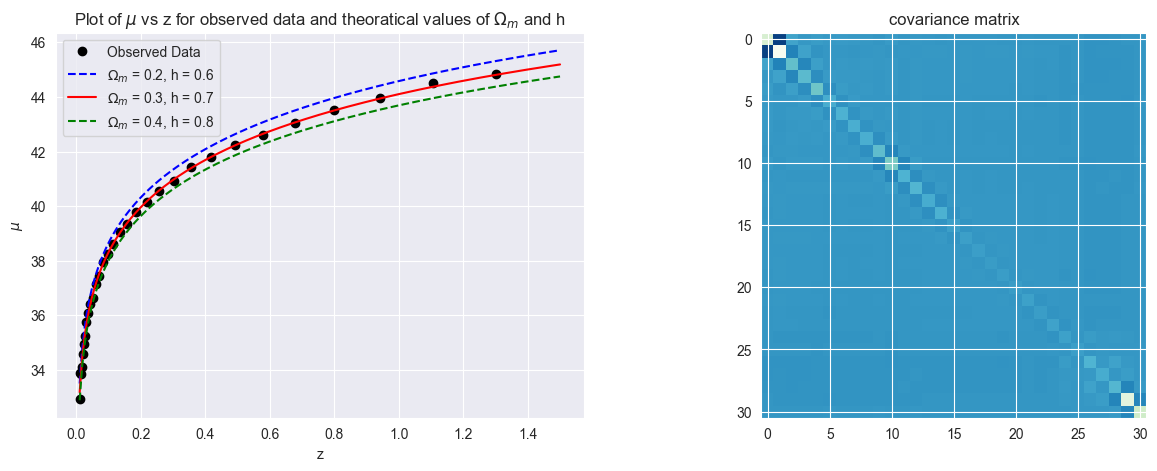

In [5]:
z_th = np.linspace(0.01, 1.5, 200)
mu_th1 = mu_theory(z_th, 0.2, 0.6)
mu_th2 = mu_theory(z_th, 0.3, 0.7)
mu_th3 = mu_theory(z_th, 0.4, 0.8)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.plot(z, mu,'o', label="Observed Data",color='black')
ax0.plot(z_th, mu_th1, label="$\Omega_m$ = 0.2, h = 0.6",color='blue',linestyle='dashed')
ax0.plot(z_th, mu_th2, label="$\Omega_m$ = 0.3, h = 0.7",color='red')
ax0.plot(z_th, mu_th3, label="$\Omega_m$ = 0.4, h = 0.8",color='green',linestyle='dashed')
ax0.set_ylabel('$\mu$')
ax0.set_xlabel('z')
ax0.set_title('Plot of $\mu$ vs z for observed data and theoratical values of $\Omega_m$ and h')
ax1.imshow(cov_matrix, cmap="GnBu_r")
ax1.set_title("covariance matrix")
ax0.legend()
plt.show()

In [5]:
# 后验分布
def posterior(params):
    Omega_m, h = params
    if not (0 < Omega_m < 1 and 0 < h < 1):
        return 0  # 超出范围的样本返回零
    MU_diff = mu_diff(Omega_m, h)
    likelihood = np.exp(-0.5 * np.dot(MU_diff, np.dot(np.linalg.inv(cov_matrix), MU_diff)))
    prior = 1  # 假设均匀先验
    return prior * likelihood


def ProposedStep(oldsamp, sigmaprop, D):
    newsamp = oldsamp + np.random.normal(0., sigmaprop, D)
    return newsamp


# Hastings ratio
def HastingsRatio(newsamp, oldsamp, priorrange, PDF, *Pargs):
    # PDF: posterior distribution function
    if not ((np.array([p1 - p2 for p1, p2 in zip(newsamp, np.transpose(priorrange)[:][0])]) > 0).all() \
            and (np.array([p2 - p1 for p1, p2 in zip(newsamp, np.transpose(priorrange)[:][1])]) > 0).all()):
        acc = False
        return acc, oldsamp  # make sure the samples are in the desired range, acc: acceptance
    newprob = PDF(newsamp, *Pargs)
    oldprob = PDF(oldsamp, *Pargs)
    if newprob >= oldprob:
        acc = True
        return acc, newsamp
    else:
        prob = newprob / oldprob
        acc = np.random.choice([True, False], p=[prob, 1. - prob])
        return acc, acc * newsamp + (1. - acc) * oldsamp

    # MCMC采样


def MCMC(PDF, D, Nsteps, priorrange, sigmaprop, *Pargs):
    oldsamp = np.array([np.random.uniform(priorrange[d][0], priorrange[d][1]) for d in range(D)])
    count = 0
    samples = [oldsamp]

    for i in range(Nsteps):
        newsamp = ProposedStep(oldsamp, sigmaprop, D)
        acc, newsamp = HastingsRatio(newsamp, oldsamp, priorrange, PDF, *Pargs)
        samples.append(newsamp)
        if acc:
            count += 1
        oldsamp = newsamp

    AR = 1. * count / Nsteps
    return np.array(samples), AR

In [6]:
# 采样设置
M = 5
N = 5000
Nburn = 150
sigmaprop = 0.015
D = 2  # 两个参数：Omega_m 和 h
priorrange = np.array([[0, 1], [0, 1]])

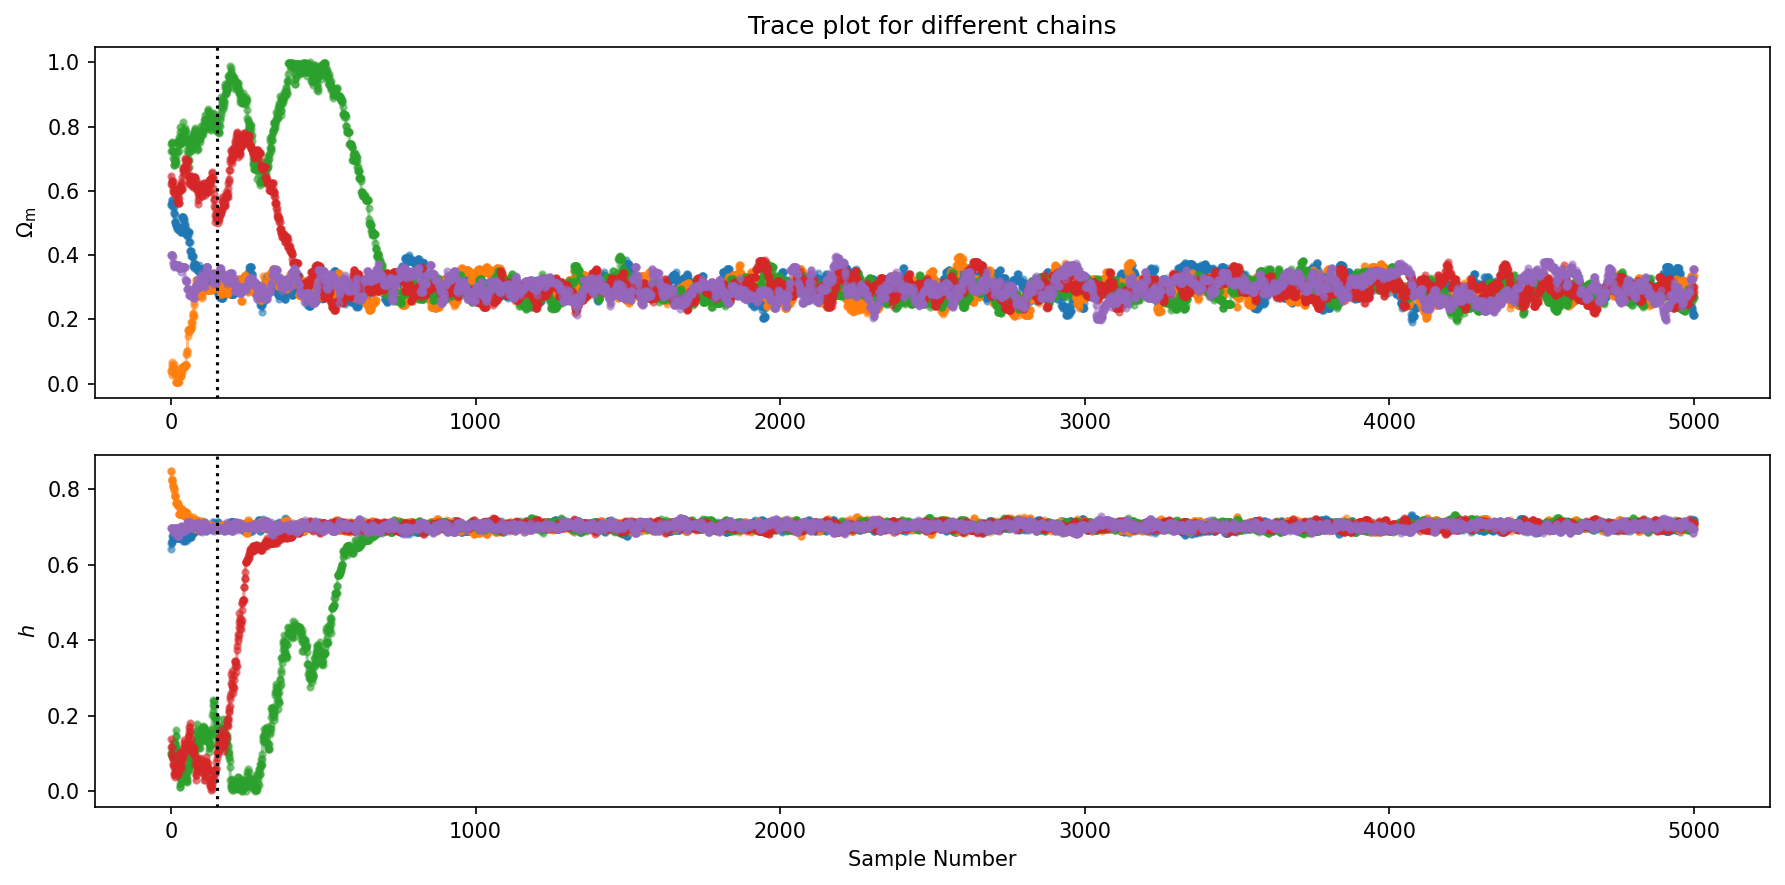

For chain no.: 1   Acceptance ratio = 0.3664
    h_mean, h_std    = 0.702, 0.007
    Ωm_mean, Ωm_std  = 0.303, 0.031
    
For chain no.: 2   Acceptance ratio = 0.3664
    h_mean, h_std    = 0.703, 0.007
    Ωm_mean, Ωm_std  = 0.294, 0.032
    
For chain no.: 3   Acceptance ratio = 0.3664
    h_mean, h_std    = 0.664, 0.136
    Ωm_mean, Ωm_std  = 0.35, 0.176
    
For chain no.: 4   Acceptance ratio = 0.3664
    h_mean, h_std    = 0.693, 0.063
    Ωm_mean, Ωm_std  = 0.314, 0.082
    
For chain no.: 5   Acceptance ratio = 0.3664
    h_mean, h_std    = 0.702, 0.007
    Ωm_mean, Ωm_std  = 0.3, 0.033
    


In [25]:
# 运行MCMC采样并存储所有链的样本
all_samples = []
for i in range(M):
    samples, AR = MCMC(posterior, D, N, priorrange, sigmaprop)
    all_samples.append(samples)

# 提取 Omega_m 和 h 的样本
Omega_m_samples = [samples[:, 0] for samples in all_samples]
h_samples = [samples[:, 1] for samples in all_samples]

# 绘制追踪图
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 6), dpi=150)

# Omega_m 追踪图
for i in range(M):
    ax0.plot(Omega_m_samples[i], marker='.', alpha=0.5)
ax0.axvline(Nburn, color='black', linestyle=':')
ax0.set_ylabel("$\Omega_\mathrm{m}$")
ax0.set_title("Trace plot for different chains")

# h 追踪图
for i in range(M):
    ax1.plot(h_samples[i], marker='.', alpha=0.5)
ax1.axvline(Nburn, color='black', linestyle=':')
ax1.set_ylabel("$h$")
ax1.set_xlabel("Sample Number")

plt.tight_layout()
plt.show()

# 打印接受比率及样本统计
for i in range(M):
    print(f'''For chain no.: {i + 1}   Acceptance ratio = {AR}
    h_mean, h_std    = {round(np.average(h_samples[i][Nburn:]), 3)}, {round(np.std(h_samples[i][Nburn:]), 3)}
    Ωm_mean, Ωm_std  = {round(np.average(Omega_m_samples[i][Nburn:]), 3)}, {round(np.std(Omega_m_samples[i][Nburn:]), 3)}
    ''')

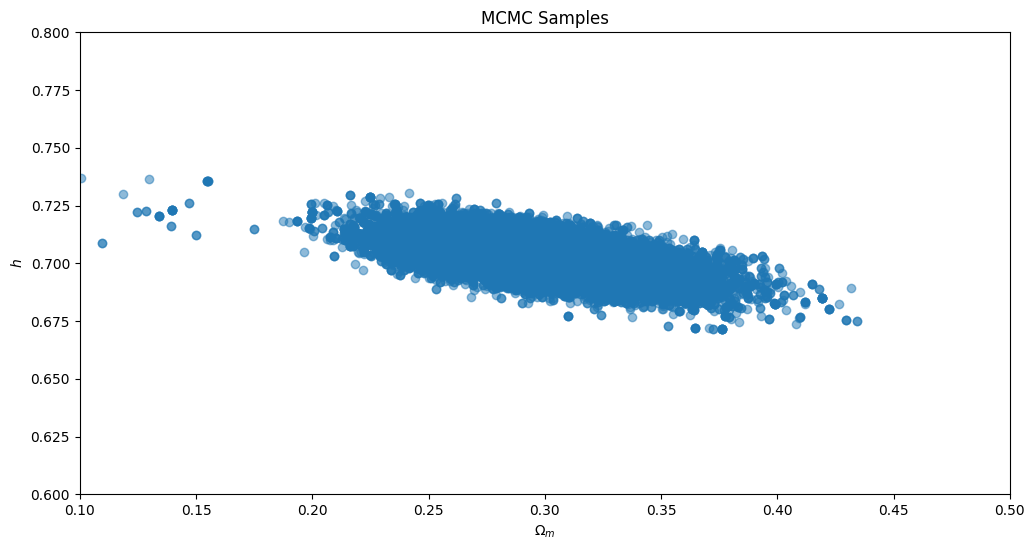

Acceptance Ratio: 0.3776


In [7]:
# 采样设置
M = 5
N = 50000
Nburn = 150
sigmaprop = 0.015
D = 2  # 两个参数：Omega_m 和 h
priorrange = np.array([[0, 1], [0, 1]])

# 运行MCMC采样
samples, AR = MCMC(posterior, D, N, priorrange, sigmaprop)

# 绘制结果
plt.figure(figsize=(12, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.xlim(0.1,0.5)
plt.ylim(0.6,0.8)
plt.xlabel("$\Omega_m$")
plt.ylabel("$h$")
plt.title("MCMC Samples")
plt.show()

print('Acceptance Ratio:', AR)

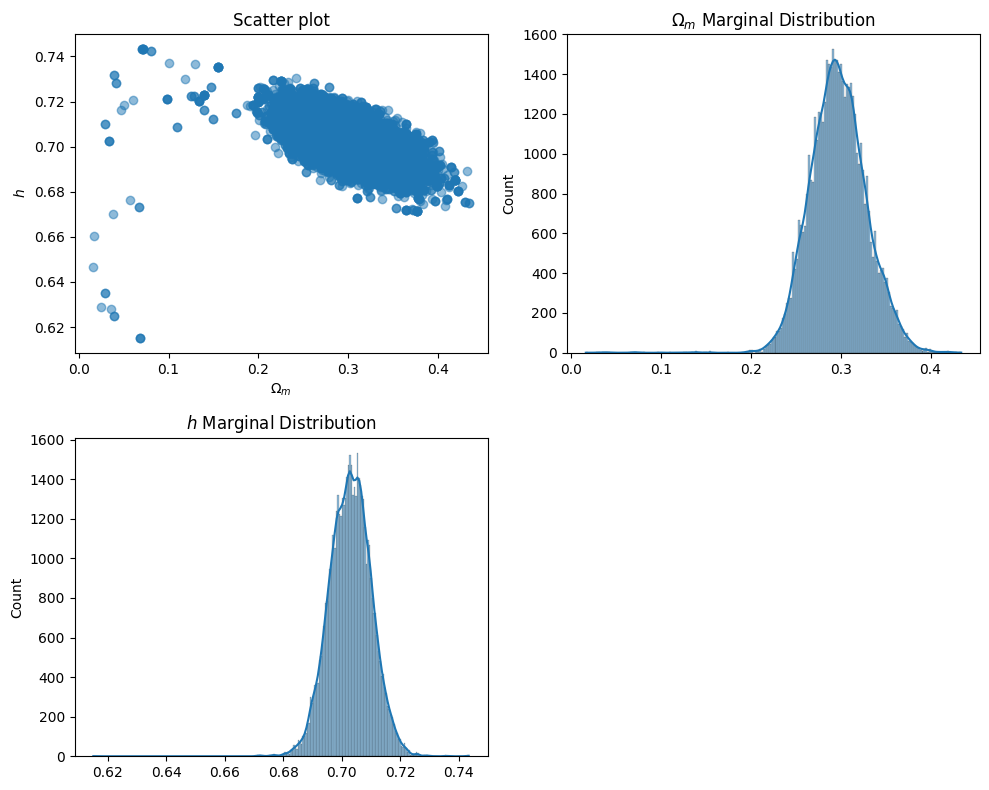

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 samples 是你的 MCMC 输出
Omega_m_samples = samples[:, 0]
h_samples = samples[:, 1]

# 创建一个 2x2 的子图
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 绘制散点图
axs[0, 0].scatter(Omega_m_samples, h_samples, alpha=0.5)
axs[0, 0].set_xlabel('$\Omega_m$')
axs[0, 0].set_ylabel('$h$')
axs[0, 0].set_title('Scatter plot')

# 绘制边际直方图
sns.histplot(Omega_m_samples, ax=axs[0, 1], kde=True)
axs[0, 1].set_title('$\Omega_m$ Marginal Distribution')

sns.histplot(h_samples, ax=axs[1, 0], kde=True)
axs[1, 0].set_title('$h$ Marginal Distribution')

# 隐藏空白子图
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

下面我们用 getdist 来进行可视化。

Removed no burn in


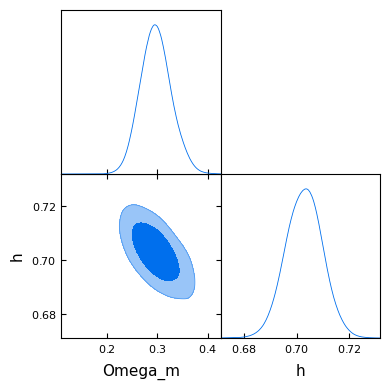

In [8]:
import getdist
from getdist import MCSamples, plots

# 假设 samples 是你的 MCMC 输出
# 提取 Omega_m 和 h 的样本
Omega_m_samples = samples[:, 0]
h_samples = samples[:, 1]

# 创建 MCSamples 对象
samples = np.column_stack((Omega_m_samples, h_samples))
labels = ['Omega_m', 'h']
mc_samples = MCSamples(samples=samples, names=labels)

# 创建绘图对象
g = plots.getSubplotPlotter()

# 绘制三角图
g.triangle_plot(mc_samples, filled=True)

# 显示图形
plt.show()